### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [93]:
%pip install missingno
%pip install requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import missingno as msno
import requests
import json

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Lendo os dados da base única de 2018 a 2024

In [3]:
df_accidents = pd.read_csv(
    "../acquisition/datatran2018_2024.csv"
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_35709/3303668057.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436718 entries, 0 to 436717
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      436718 non-null  float64
 1   data_inversa            436718 non-null  object 
 2   dia_semana              436718 non-null  object 
 3   horario                 436718 non-null  object 
 4   uf                      436718 non-null  object 
 5   br                      436267 non-null  float64
 6   km                      436267 non-null  object 
 7   municipio               436718 non-null  object 
 8   causa_acidente          436718 non-null  object 
 9   tipo_acidente           436718 non-null  object 
 10  classificacao_acidente  436715 non-null  object 
 11  fase_dia                436718 non-null  object 
 12  sentido_via             436718 non-null  object 
 13  condicao_metereologica  436718 non-null  object 
 14  tipo_pista          

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

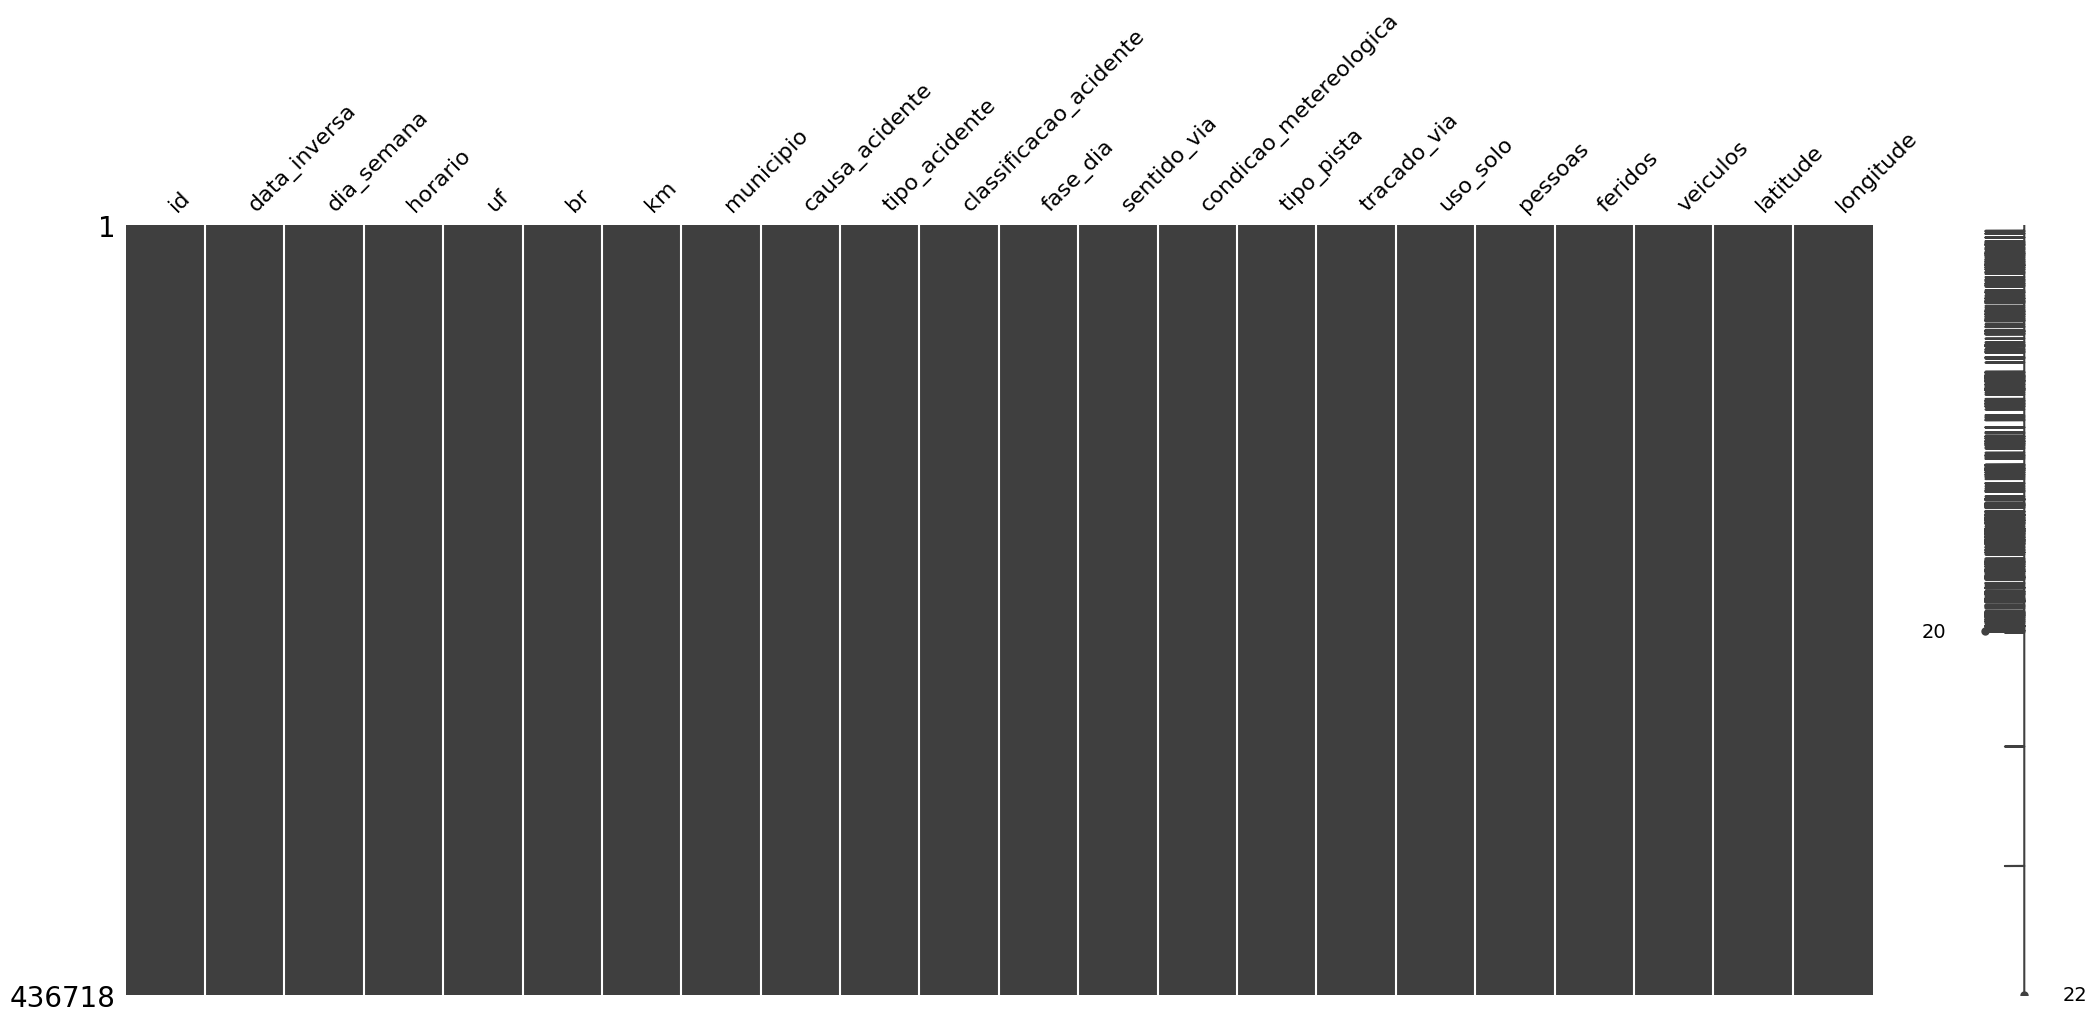

In [4]:
msno.matrix(df=df_accidents)

#### Verificando informações da coluna "br" para identificar dados faltantes

In [5]:
df_accidents["br"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: br
Non-Null Count   Dtype  
--------------   -----  
436267 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


#### Verificando dados estatísticos da coluna "br"para avaliar a necessidade de tratamento dos dados

In [6]:
df_accidents["br"].describe()

count    436267.000000
mean        212.121939
std         130.577461
min           0.000000
25%         101.000000
50%         158.000000
75%         324.000000
max         498.000000
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" para avaliar a necessidade de tratamento dos dados

In [7]:
df_accidents["br"].value_counts().head()

br
101.0    73787
116.0    65465
381.0    21030
40.0     20747
153.0    16902
Name: count, dtype: int64

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [8]:
df_accidents["br"] = pd.to_numeric(
    df_accidents["br"], errors="coerce").fillna(0).astype(int)

df_accidents["br"] = np.where(
    df_accidents["br"] != 0, df_accidents["br"].astype(str), "Desconhecido")

df_accidents["br"].value_counts().head()

br
101    73787
116    65465
381    21030
40     20747
153    16902
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "br" após o tratamento dos dados

In [9]:
df_accidents["br"].describe()

count     436718
unique       132
top          101
freq       73787
Name: br, dtype: object

#### Verificando informações da coluna "km" para identificar dados faltantes

In [10]:
df_accidents["km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: km
Non-Null Count   Dtype 
--------------   ----- 
436267 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "km"para avaliar a necessidade de tratamento dos dados

In [11]:
df_accidents["km"].describe()

count     436267
unique      9740
top            1
freq        1911
Name: km, dtype: object

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "km"

In [12]:
df_accidents["km"] = pd.to_numeric(
    df_accidents["km"], errors="coerce").fillna(0).astype(int)

df_accidents["km"] = np.where(
    df_accidents["km"] != 0, df_accidents["km"].astype(str), "Desconhecido")

df_accidents["km"].value_counts().head()

km
Desconhecido    191360
1                 1911
3                 1760
2                 1755
5                 1637
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "km" após o tratamento dos dados

In [13]:
df_accidents["km"].describe()

count           436718
unique            1198
top       Desconhecido
freq            191360
Name: km, dtype: object

#### Verificando informações da coluna "data_inversa"

In [14]:
df_accidents["data_inversa"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: data_inversa
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "data_inversa"para avaliar a necessidade de tratamento dos dados

In [15]:
df_accidents["data_inversa"].describe()

count         436718
unique          2373
top       2018-02-10
freq             325
Name: data_inversa, dtype: object

#### Verificando a frequência dos valores da coluna "data_inversa" para avaliar a necessidade de tratamento dos dados

In [16]:
df_accidents["data_inversa"].value_counts().head()

data_inversa
2018-02-10    325
2018-12-22    325
2024-12-21    319
2018-02-09    313
2023-12-23    303
Name: count, dtype: int64

#### Padronizando o formato da data do campo data_inversa para dd/MM/yyyy

In [17]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format='mixed', dayfirst=True).dt.strftime('%d/%m/%Y').to_frame()

df_accidents["data_inversa"].value_counts().head()

data_inversa
10/02/2018    325
22/12/2018    325
21/12/2024    319
09/02/2018    313
23/12/2023    303
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "data_inversa" após do tratamento dos dados

In [18]:
df_accidents["data_inversa"].describe()

count         436718
unique          2373
top       10/02/2018
freq             325
Name: data_inversa, dtype: object

#### Criando coluna auxiliar mês para facilitar análise futura

In [19]:
months = {
    1: "Janeiro",
    2: "Fevereiro",
    3: "Março",
    4: "Abril",
    5: "Maio",
    6: "Junho",
    7: "Julho",
    8: "Agosto",
    9: "Setembro",
    10: "Outubro",
    11: "Novembro",
    12: "Dezembro",
}

formatted_month = pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.month.map(months)

if "mes" in df_accidents.columns:
    df_accidents["mes"] = formatted_month
else:
    df_accidents = df_accidents.assign(**{"mes": formatted_month})
df_accidents["mes"].value_counts()

mes
Janeiro      39072
Março        38549
Junho        38248
Dezembro     37824
Maio         37747
Fevereiro    36495
Abril        36472
Outubro      35369
Setembro     34423
Julho        34378
Agosto       34178
Novembro     33963
Name: count, dtype: int64

#### Criando coluna auxiliar ano para facilitar análise futura

In [20]:
formatted_year = pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.year

if "ano" in df_accidents.columns:
    df_accidents["ano"] = formatted_year
else:
    df_accidents = df_accidents.assign(**{"ano": formatted_year})

df_accidents["ano"].value_counts().head()

ano
2024    73156
2018    69295
2023    67766
2019    67446
2022    64606
Name: count, dtype: int64

#### Obtendo lista de feriados à partir de um determinado ano

In [21]:
from datetime import datetime

holidays = []

for year in [2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    try:
        response = requests.get(
            f"https://brasilapi.com.br/api/feriados/v1/{year}")
        response.raise_for_status()
        holidays.extend([{
            "date": datetime.strptime(data["date"], "%Y-%m-%d").strftime("%d/%m/%Y"),
            "name": data["name"]
        } for data in response.json()])
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar feriados de {year}: {e}")

holidays

[{'date': '01/01/2018', 'name': 'Confraternização mundial'},
 {'date': '13/02/2018', 'name': 'Carnaval'},
 {'date': '30/03/2018', 'name': 'Sexta-feira Santa'},
 {'date': '01/04/2018', 'name': 'Páscoa'},
 {'date': '21/04/2018', 'name': 'Tiradentes'},
 {'date': '01/05/2018', 'name': 'Dia do trabalho'},
 {'date': '31/05/2018', 'name': 'Corpus Christi'},
 {'date': '07/09/2018', 'name': 'Independência do Brasil'},
 {'date': '12/10/2018', 'name': 'Nossa Senhora Aparecida'},
 {'date': '02/11/2018', 'name': 'Finados'},
 {'date': '15/11/2018', 'name': 'Proclamação da República'},
 {'date': '25/12/2018', 'name': 'Natal'},
 {'date': '01/01/2019', 'name': 'Confraternização mundial'},
 {'date': '05/03/2019', 'name': 'Carnaval'},
 {'date': '19/04/2019', 'name': 'Sexta-feira Santa'},
 {'date': '21/04/2019', 'name': 'Páscoa'},
 {'date': '21/04/2019', 'name': 'Tiradentes'},
 {'date': '01/05/2019', 'name': 'Dia do trabalho'},
 {'date': '20/06/2019', 'name': 'Corpus Christi'},
 {'date': '07/09/2019', 'na

#### Criando coluna feriado preenchendo os registros com o nome do feriado ou dia útil

In [22]:
holidays_dict = {holiday["date"]: holiday["name"] for holiday in holidays}

df_accidents["tipo_data"] = df_accidents["data_inversa"].map(
    holidays_dict).fillna("Dia útil")

df_accidents["tipo_data"].value_counts().head()

tipo_data
Dia útil                    421780
Confraternização mundial      1439
Tiradentes                    1282
Dia do trabalho               1276
Proclamação da República      1265
Name: count, dtype: int64

#### Verificando informações da coluna "dia_semana"

In [23]:
df_accidents["dia_semana"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: dia_semana
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "dia_semana"para avaliar a necessidade de tratamento dos dados

In [24]:
df_accidents["dia_semana"].describe()

count      436718
unique          7
top       domingo
freq        72073
Name: dia_semana, dtype: object

#### Verificando a frequência dos valores da coluna "dia_semana" para avaliar a necessidade de tratamento dos dados

In [25]:
df_accidents["dia_semana"].value_counts()

dia_semana
domingo          72073
sábado           71853
sexta-feira      67288
segunda-feira    59522
quinta-feira     56770
quarta-feira     55104
terça-feira      54108
Name: count, dtype: int64

#### Tratamento da coluna "dia_semana" para corrigir codificação

In [26]:
days_of_week = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}

df_accidents["dia_semana"] = pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.day_of_week.map(days_of_week)

df_accidents["dia_semana"].value_counts().head()

dia_semana
Domingo          72073
Sábado           71853
Sexta-feira      67288
Segunda-feira    59522
Quinta-feira     56770
Name: count, dtype: int64

#### Verificando informações da coluna "causa_acidente"

In [27]:
df_accidents["causa_acidente"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: causa_acidente
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "causa_acidente"para avaliar a necessidade de tratamento dos dados

In [28]:
df_accidents["causa_acidente"].describe()

count                          436718
unique                             91
top       Falta de Atenção à Condução
freq                            73231
Name: causa_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "causa_acidente" para avaliar a necessidade de tratamento dos dados

In [29]:
df_accidents["causa_acidente"].value_counts()

causa_acidente
Falta de Atenção à Condução                          73231
Velocidade Incompatível                              35819
Reação tardia ou ineficiente do condutor             32348
Ausência de reação do condutor                       29866
Desobediência às normas de trânsito pelo condutor    24089
                                                     ...  
Redutor de velocidade em desacordo                      28
Faróis desregulados                                     24
Sinalização encoberta                                   16
Obstrução Via tentativa Assalto                         10
Sistema de drenagem ineficiente                          7
Name: count, Length: 91, dtype: int64

In [30]:
try:
    with open("../wrangling/causas_acidentes.json", "r", encoding="utf-8") as file:
        cause_of_accidents = json.load(file)

        condition = df_accidents["causa_acidente"].isin(
            cause_of_accidents.keys())

        value_match_true = df_accidents["causa_acidente"].map(
            lambda cause: cause_of_accidents.get(cause, cause).capitalize())

        value_match_false = df_accidents["causa_acidente"].str.capitalize()

        df_accidents["causa_acidente"] = np.where(
            condition, value_match_true, value_match_false)
except Exception as exception:
    print(exception)

df_accidents["causa_acidente"].value_counts().head()

causa_acidente
Falta de atenção à condução                                      73231
Velocidade incompatível                                          35819
Reação tardia ou ineficiente do condutor                         32348
Ausência de reação do condutor                                   29866
Ingestão de álcool e/ou substâncias psicoativas pelo condutor    29622
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_acidente"

In [31]:
df_accidents["tipo_acidente"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: tipo_acidente
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "tipo_acidente"para avaliar a necessidade de tratamento dos dados

In [32]:
df_accidents["tipo_acidente"].describe()

count               436718
unique                  21
top       Colisão traseira
freq                 82354
Name: tipo_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_acidente" para avaliar a necessidade de tratamento dos dados

In [33]:
df_accidents["tipo_acidente"].value_counts()

tipo_acidente
Colisão traseira                   82354
Saída de leito carroçável          68689
Colisão transversal                54937
Tombamento                         36266
Colisão frontal                    29477
Colisão lateral                    24809
Colisão lateral mesmo sentido      23563
Atropelamento de Pedestre          20296
Queda de ocupante de veículo       19623
Colisão com objeto                 17080
Colisão com objeto estático        14404
Capotamento                        12324
Incêndio                            8259
Atropelamento de Animal             7579
Engavetamento                       6782
Colisão lateral sentido oposto      6564
Eventos atípicos                    1054
Derramamento de carga               1044
Colisão com objeto em movimento      967
Danos eventuais                      635
Sinistro pessoal de trânsito          12
Name: count, dtype: int64

#### Tratamento da coluna "tipo_acidente" para capitalizar os dados

In [34]:
df_accidents["tipo_acidente"] = df_accidents["tipo_acidente"].apply(
    lambda data: data.capitalize())

df_accidents["tipo_acidente"].value_counts().head()

tipo_acidente
Colisão traseira             82354
Saída de leito carroçável    68689
Colisão transversal          54937
Tombamento                   36266
Colisão frontal              29477
Name: count, dtype: int64

#### Verificando informações da coluna "classificacao_acidente"

In [35]:
df_accidents["classificacao_acidente"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: classificacao_acidente
Non-Null Count   Dtype 
--------------   ----- 
436715 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [36]:
df_accidents["classificacao_acidente"].describe()

count                  436715
unique                      3
top       Com Vítimas Feridas
freq                   327874
Name: classificacao_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [37]:
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com Vítimas Feridas    327874
Sem Vítimas             78301
Com Vítimas Fatais      30540
Name: count, dtype: int64

#### Tratamento da coluna "classificacao_acidente" para definir dados faltantes como "Sem classificação"

In [38]:
df_accidents["classificacao_acidente"] = df_accidents["classificacao_acidente"].fillna(
    "Sem classificação")

df_accidents["classificacao_acidente"] = df_accidents["classificacao_acidente"].apply(
    lambda data: data.capitalize())
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com vítimas feridas    327874
Sem vítimas             78301
Com vítimas fatais      30540
Sem classificação           3
Name: count, dtype: int64

#### Verificando informações da coluna "fase_dia"

In [39]:
df_accidents["fase_dia"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: fase_dia
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [40]:
df_accidents["fase_dia"].describe()

count        436718
unique            4
top       Pleno dia
freq         238933
Name: fase_dia, dtype: object

#### Verificando a frequência dos valores da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [41]:
df_accidents["fase_dia"].value_counts()

fase_dia
Pleno dia      238933
Plena Noite    152663
Anoitecer       24066
Amanhecer       21056
Name: count, dtype: int64

#### Tratamento da coluna "fase_dia" para capitalizar os dados

In [42]:
df_accidents["fase_dia"] = df_accidents["fase_dia"].apply(
    lambda data: data.capitalize())

df_accidents["fase_dia"].value_counts().head()

fase_dia
Pleno dia      238933
Plena noite    152663
Anoitecer       24066
Amanhecer       21056
Name: count, dtype: int64

#### Verificando informações da coluna "condicao_metereologica"

In [43]:
df_accidents["condicao_metereologica"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: condicao_metereologica
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [44]:
df_accidents["condicao_metereologica"].describe()

count        436718
unique           10
top       Céu Claro
freq         262859
Name: condicao_metereologica, dtype: object

#### Verificando a frequência dos valores da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [45]:
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262859
Nublado              71755
Chuva                47270
Sol                  29126
Garoa/Chuvisco       15289
Ignorado              5899
Nevoeiro/Neblina      3671
Vento                  825
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Verificando informações da coluna "uso_solo"

In [46]:
df_accidents["uso_solo"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: uso_solo
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [47]:
df_accidents["uso_solo"].describe()

count     436718
unique         2
top          Não
freq      245773
Name: uso_solo, dtype: object

#### Verificando a frequência dos valores da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [48]:
df_accidents["uso_solo"].value_counts()

uso_solo
Não    245773
Sim    190945
Name: count, dtype: int64

#### Tratamento da coluna "uso_solo" para alterar para "Urbano" quando "Sim" e "Rural" quando "Não"

In [49]:
df_accidents["uso_solo"] = np.where(
    df_accidents["uso_solo"] == "Sim", "Urbano", "Rural")

df_accidents["uso_solo"].value_counts().head()

uso_solo
Rural     245773
Urbano    190945
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_pista"

In [50]:
df_accidents["tipo_pista"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: tipo_pista
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [51]:
df_accidents["tipo_pista"].describe()

count      436718
unique          3
top       Simples
freq       217959
Name: tipo_pista, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [52]:
df_accidents["tipo_pista"].value_counts()

tipo_pista
Simples     217959
Dupla       180760
Múltipla     37999
Name: count, dtype: int64

#### Verificando informações da coluna "sentido_via"

In [53]:
df_accidents["sentido_via"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: sentido_via
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [54]:
df_accidents["sentido_via"].describe()

count        436718
unique            3
top       Crescente
freq         233661
Name: sentido_via, dtype: object

#### Verificando a frequência dos valores da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [55]:
df_accidents["sentido_via"].value_counts()

sentido_via
Crescente        233661
Decrescente      202061
Não Informado       996
Name: count, dtype: int64

#### Verificando informações da coluna "tracado_via"

In [56]:
df_accidents["tracado_via"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: tracado_via
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [57]:
df_accidents["tracado_via"].describe()

count     436718
unique       973
top         Reta
freq      258186
Name: tracado_via, dtype: object

#### Verificando a frequência dos valores da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [58]:
tracado_via = df_accidents["tracado_via"].value_counts()
tracado_via

tracado_via
Reta                                                                258186
Curva                                                                62709
Não Informado                                                        25504
Interseção de vias                                                   10724
Rotatória                                                             7849
                                                                     ...  
Desvio Temporário;Aclive;Em Obras;Reta                                   1
Reta;Interseção de Vias;Aclive;Retorno Regulamentado                     1
Retorno Regulamentado;Curva;Interseção de Vias;Aclive                    1
Reta;Interseção de Vias;Em Obras;Aclive                                  1
Interseção de Vias;Rotatória;Reta;Em Obras;Retorno Regulamentado         1
Name: count, Length: 973, dtype: int64

#### Exportando os traçados de via encontrados (973) para um arquivo para analisar como fazer o tratamento

In [59]:
tracado_via.index.to_frame(
    name="tracado_via").to_csv("../wrangling/tracado_via.csv", index=False)

#### Removendo a coluna tracado_via, pois seus dados estão muito complexos para serem agrupados. Em alguns casos existem dados com Ponte;Reta e Reta;Ponte. Dessa forma, não é possível saber qual o valor correto. A remoção desta coluna não deve influenciar nas análises posteriores

In [60]:
df_accidents = df_accidents.drop(columns=[
    "tracado_via"
])
df_accidents.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tipo_pista,uso_solo,pessoas,feridos,veiculos,latitude,longitude,mes,ano,tipo_data
0,99973.0,01/01/2018,Segunda-feira,00:20:00,RJ,116,Desconhecido,RESENDE,Condutor dormindo,Saída de leito carroçável,...,Múltipla,Urbano,5,4,1,"-22,46937","-44,44705",Janeiro,2018,Confraternização mundial
1,99976.0,01/01/2018,Segunda-feira,00:40:00,SC,282,Desconhecido,FLORIANOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,Dupla,Urbano,3,2,2,"-27,59971687","-48,57565694",Janeiro,2018,Confraternização mundial
2,99977.0,01/01/2018,Segunda-feira,00:30:00,RJ,493,1,ITABORAI,Ultrapassagem indevida,Colisão frontal,...,Simples,Rural,5,1,3,"-22,763901","-42,927532",Janeiro,2018,Confraternização mundial
3,99981.0,01/01/2018,Segunda-feira,01:15:00,RS,386,134,SARANDI,Ingestão de álcool e/ou substâncias psicoativa...,Colisão transversal,...,Simples,Rural,2,0,2,"-27,953636","-52,916374",Janeiro,2018,Confraternização mundial
4,99982.0,01/01/2018,Segunda-feira,00:20:00,RS,293,Desconhecido,CANDIOTA,Falta de atenção à condução,Saída de leito carroçável,...,Simples,Rural,1,1,1,"-31,395214","-53,78391174",Janeiro,2018,Confraternização mundial


#### Verificando informações da coluna "pessoas"

In [61]:
df_accidents["pessoas"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: pessoas
Non-Null Count   Dtype
--------------   -----
436718 non-null  int64
dtypes: int64(1)
memory usage: 3.3 MB


#### Verificando dados estatísticos da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [62]:
df_accidents["pessoas"].describe()

count    436718.000000
mean          2.468852
std           2.033143
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          95.000000
Name: pessoas, dtype: float64

#### Verificando a frequência dos valores da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [137]:
df_accidents["pessoas"].value_counts()

pessoas
2     179259
1     107301
3      81623
4      34355
5      17122
       ...  
95         1
74         1
68         1
93         1
66         1
Name: count, Length: 74, dtype: int64

#### Tratamento da coluna "pessoas" para remover linhas, onde a frequência da quantidade de pessoas envolvidas, em um acidente, é menor que 7 (menos de 1 ocorrência por ano)

In [158]:
frequency = 7
filtered_people = df_accidents["pessoas"].value_counts()
filtered_people = filtered_people[filtered_people <= frequency].index

people_indexes = df_accidents[df_accidents["pessoas"].isin(
    filtered_people)].index

df_accidents = df_accidents.drop(people_indexes)
df_accidents["pessoas"].value_counts().tail(20)

pessoas
43    19
47    18
45    18
42    17
33    17
30    16
41    16
48    15
36    15
37    15
50    14
38    14
49    13
44    12
51    11
34    10
39    10
46     9
52     9
54     8
Name: count, dtype: int64

#### Gerando histograma para a coluna "pessoas" a fim de entender melhor a distribuição de pessoas, visto que foram identificados valores discrepantes na análise anterior

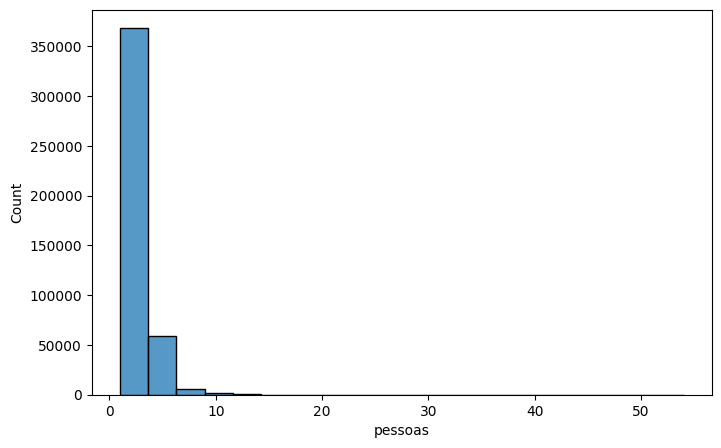

In [164]:
plt.figure(figsize=(8, 5))
sns.histplot(df_accidents["pessoas"], bins=20)
plt.show()

#### Gerando boxplot para a coluna "pessoas" a fim de entender melhor a distribuição de pessoas à partir do histograma acima

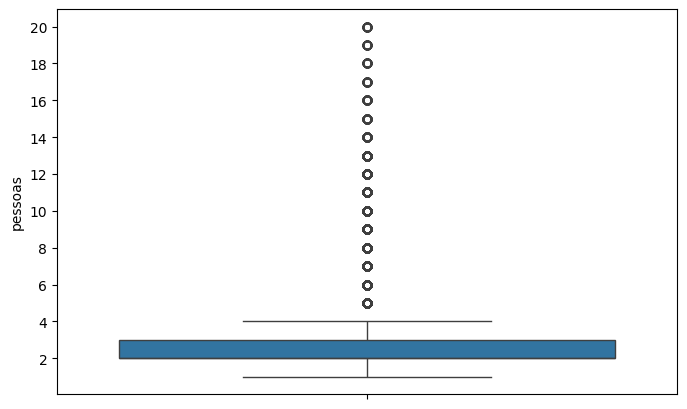

In [165]:
data = df_accidents[df_accidents["pessoas"] <= 20]
plt.figure(figsize=(8, 5))
sns.boxplot(data["pessoas"])
plt.gca().yaxis.set_major_locator(
    mticker.MultipleLocator(2))
plt.gca().yaxis.set_major_formatter(
    mticker.StrMethodFormatter("{x:.0f}"))
plt.show()

#### Verificando informações da coluna "veiculos"

In [65]:
df_accidents["veiculos"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: veiculos
Non-Null Count   Dtype
--------------   -----
436718 non-null  int64
dtypes: int64(1)
memory usage: 3.3 MB


#### Verificando dados estatísticos da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [66]:
df_accidents["veiculos"].describe()

count    436718.000000
mean          1.808357
std           0.954748
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         131.000000
Name: veiculos, dtype: float64

#### Verificando a frequência dos valores da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [67]:
df_accidents["veiculos"].value_counts()

veiculos
2      205775
1      174178
3       37665
4       11663
5        4343
6        1541
7         712
8         335
9         166
10        109
11         62
12         54
13         42
14         31
15         16
16          8
17          5
20          3
19          2
23          1
22          1
28          1
18          1
25          1
131         1
26          1
24          1
Name: count, dtype: int64

#### Gerando histograma para a coluna "veiculos" a fim de entender melhor a distribuição de veículos, visto que foram identificados valores discrepantes na análise anterior

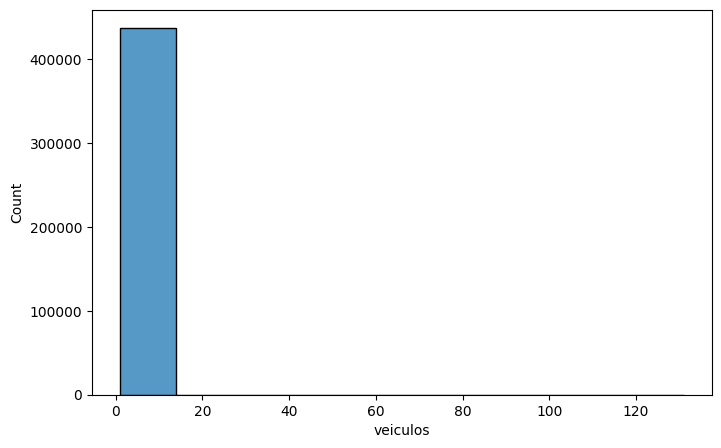

In [119]:
plt.figure(figsize=(8, 5))
sns.histplot(df_accidents["veiculos"], bins=10)
plt.show()

#### Gerando boxplot para a coluna "veiculos" a fim de entender melhor a distribuição de veículos à partir do histograma acima

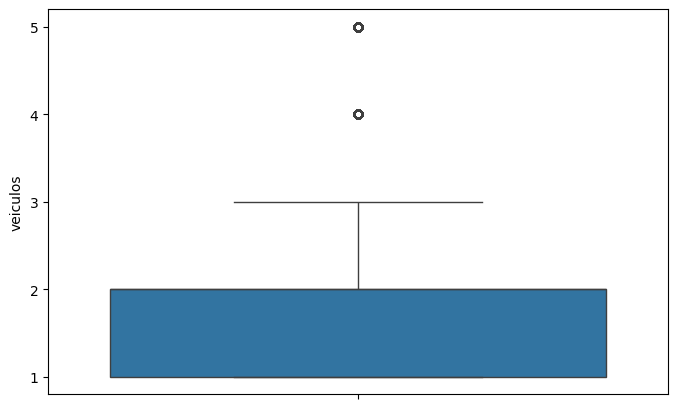

In [120]:
vehicles_limit = 5
data = df_accidents[df_accidents["veiculos"] <= vehicles_limit]
plt.figure(figsize=(8, 5))
sns.boxplot(data["veiculos"])
plt.gca().yaxis.set_major_locator(
    mticker.MultipleLocator(1))
plt.gca().yaxis.set_major_formatter(
    mticker.StrMethodFormatter("{x:.0f}"))
plt.show()

#### Reordenando o dataframe antes de salvar

In [166]:
df_accidents = df_accidents[[
    "id",
    "data_inversa",
    "tipo_data",
    "ano",
    "mes",
    "dia_semana",
    "horario",
    "fase_dia",
    "condicao_metereologica",
    "uf",
    "municipio",
    "br",
    "km",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "tipo_acidente",
    "causa_acidente",
    "classificacao_acidente",
    "pessoas",
    "veiculos",
    "latitude",
    "longitude"
]]
df_accidents.head()

,id,data_inversa,tipo_data,ano,mes,dia_semana,horario,fase_dia,condicao_metereologica,uf,...,uso_solo,tipo_pista,sentido_via,tipo_acidente,causa_acidente,classificacao_acidente,pessoas,veiculos,latitude,longitude
0,99973.0,01/01/2018,Confraternização mundial,2018,Janeiro,Segunda-feira,00:20:00,Plena noite,Nublado,RJ,...,Urbano,Múltipla,Decrescente,Saída de leito carroçável,Condutor dormindo,Com vítimas feridas,5,1,"-22,46937","-44,44705"
1,99976.0,01/01/2018,Confraternização mundial,2018,Janeiro,Segunda-feira,00:40:00,Plena noite,Céu Claro,SC,...,Urbano,Dupla,Crescente,Colisão traseira,Condutor deixou de manter distância do veículo...,Com vítimas feridas,3,2,"-27,59971687","-48,57565694"
2,99977.0,01/01/2018,Confraternização mundial,2018,Janeiro,Segunda-feira,00:30:00,Plena noite,Nublado,RJ,...,Rural,Simples,Crescente,Colisão frontal,Ultrapassagem indevida,Com vítimas feridas,5,3,"-22,763901","-42,927532"
3,99981.0,01/01/2018,Confraternização mundial,2018,Janeiro,Segunda-feira,01:15:00,Pleno dia,Céu Claro,RS,...,Rural,Simples,Crescente,Colisão transversal,Ingestão de álcool e/ou substâncias psicoativa...,Sem vítimas,2,2,"-27,953636","-52,916374"
4,99982.0,01/01/2018,Confraternização mundial,2018,Janeiro,Segunda-feira,00:20:00,Plena noite,Nublado,RS,...,Rural,Simples,Decrescente,Saída de leito carroçável,Falta de atenção à condução,Com vítimas feridas,1,1,"-31,395214","-53,78391174"


#### Salvando os dados em um novo CSV após o tratamento de dados

In [167]:
df_accidents.to_csv(
    path_or_buf="../wrangling/datatran2018_2024_dados_tratados.csv",
    index=False
)